<a href="https://colab.research.google.com/github/2CO-Machine-Training/20200302/blob/master/%EF%BC%91%EF%BC%8E%E5%BD%A2%E6%85%8B%E7%B4%A0%E8%A7%A3%E6%9E%90%E3%81%A8%E3%82%AD%E3%83%BC%E3%83%AF%E3%83%BC%E3%83%89%E5%8F%AF%E8%A6%96%E5%8C%96.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
# program 0-1 googleドライブのマウント

import os
from google.colab import drive

drive.mount('/content/drive/')
print(os.listdir('/content/drive/My Drive/data/')) # /content/drive/My Drive/data/ のファイル名を表示
# 作業ファイルをマイドライブに変更
os.chdir('/content/drive/My Drive/') 

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive/
['wiki-ja.model', '改行付きテキスト.txt', 'countID_MeCab.npy', 'countID_sentencepiece.npy', 'tfidfID_sentencepiece.npy', 'dictID_MeCab.pickle', 'dictID_sentencepiece.pickle', 'WordsID.xlsx', 'termextract2.xlsx', 'termextract - コピー.xlsx', 'result.pickle', 'word_Random Projection of the digits.jpg', 'word_Hessian LLE.jpg', 'word_Spectral Embedding.jpg', 'word_Local Tangent Space Alignment.jpg', 'word_Multi-dimensional Scaling.jpg', 'word_t-distributed.jpg', 'word_Rand

## 形態素解析器の導入

例文

<font color="Blue">【請求項１】  第１の液体を基材表面に付与されてなる第１液層を形成する工程と、  前記第１液層が形成された前記基材表面に、前記第１の液体とは非相溶であり、かつ、前記第１の液体よりも比重が大きい第２の液体の液滴をインクジェット法で付与する工程と、  前記第１の液体および第２の液体の一方の液体を選択的に硬化させる工程と、  を有する、パターン形成方法。</font>

## MeCab

In [0]:
# program 1-1-2 デフォルトのpython環境ではMeCabはインストールされていない

import MeCab

ModuleNotFoundError: ignored

In [0]:
# program 1-1-3 MeCabのインストール
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl lib

In [0]:
# program 1-1-4 MeCabが導入されたことを確認
import MeCab

エラーが起きないので、導入できていることがわかる

In [0]:
# program 1-1-5 MeCabによる形態素解析

text = '【請求項１】 第１の液体を基材表面に付与されてなる第１液層を形成する工程と、 前記第１液層が形成された前記基材表面に、前記第１の液体とは非相溶であり、かつ、前記第１の液体よりも比重が大きい第２の液体の液滴をインクジェット法で付与する工程と、 前記第１の液体および第２の液体の一方の液体を選択的に硬化させる工程と、 を有する、パターン形成方法。'

m = MeCab.Tagger('-O wakati')
result = m.parse(text)
print(result)

【 請求 項 １ 】 第 １ の 液体 を 基 材 表面 に 付与 さ れ て なる 第 １ 液 層 を 形成 する 工程 と 、 前記 第 １ 液 層 が 形成 さ れ た 前記 基 材 表面 に 、 前記 第 １ の 液体 と は 非 相 溶 で あり 、 かつ 、 前記 第 １ の 液体 より も 比重 が 大きい 第 ２ の 液体 の 液 滴 を インクジェット 法 で 付与 する 工程 と 、 前記 第 １ の 液体 および 第 ２ の 液体 の 一方 の 液体 を 選択 的 に 硬化 さ せる 工程 と 、 を 有する 、 パターン 形成 方法 。 



In [0]:
# program 1-1-6 空白を'_' で置換してみる
print(result.replace(' ', '_'))

【_請求_項_１_】_第_１_の_液体_を_基_材_表面_に_付与_さ_れ_て_なる_第_１_液_層_を_形成_する_工程_と_、_前記_第_１_液_層_が_形成_さ_れ_た_前記_基_材_表面_に_、_前記_第_１_の_液体_と_は_非_相_溶_で_あり_、_かつ_、_前記_第_１_の_液体_より_も_比重_が_大きい_第_２_の_液体_の_液_滴_を_インクジェット_法_で_付与_する_工程_と_、_前記_第_１_の_液体_および_第_２_の_液体_の_一方_の_液体_を_選択_的_に_硬化_さ_せる_工程_と_、_を_有する_、_パターン_形成_方法_。_



In [0]:
# program 1-1-7 品詞解析例
m = MeCab.Tagger('-O chasen')
result = m.parse('第１の液体を基材表面に付与されてなる第１液層を形成する工程と、')
print(result)

第	ダイ	第	接頭詞-数接続		
１	イチ	１	名詞-数		
の	ノ	の	助詞-連体化		
液体	エキタイ	液体	名詞-一般		
を	ヲ	を	助詞-格助詞-一般		
基	モト	基	名詞-一般		
材	ザイ	材	名詞-接尾-一般		
表面	ヒョウメン	表面	名詞-一般		
に	ニ	に	助詞-格助詞-一般		
付与	フヨ	付与	名詞-サ変接続		
さ	サ	する	動詞-自立	サ変・スル	未然レル接続
れ	レ	れる	動詞-接尾	一段	連用形
て	テ	て	助詞-接続助詞		
なる	ナル	なる	動詞-自立	五段・ラ行	基本形
第	ダイ	第	接頭詞-数接続		
１	イチ	１	名詞-数		
液	エキ	液	名詞-一般		
層	ソウ	層	名詞-接尾-一般		
を	ヲ	を	助詞-格助詞-一般		
形成	ケイセイ	形成	名詞-サ変接続		
する	スル	する	動詞-自立	サ変・スル	基本形
工程	コウテイ	工程	名詞-一般		
と	ト	と	助詞-並立助詞		
、	、	、	記号-読点		
EOS



## Sentencepiece

In [0]:
# program 1-1-8 sentencepieceのインストール
pip install sentencepiece

     |████████████████████████████████| 1.0MB 2.8MB/s 


SentencePiece用学習モデルの事前準備

以下のサイトで日本語wikipediaの学習済みモデルを公開しています。

>BERT with SentencePiece を日本語 Wikipedia で学習してモデルを公開しました
>'https://yoheikikuta.github.io/bert-japanese/'

記事に従って**wiki-ja.model**をダウンロードして適当な場所
（/content/drive/My Drive/data/）
に保存します。

モデルを自分で作ることもできます。

google drive に入出力するときは、ドライブをマウントします。

次のセルを実行し、Go to this URL in a browser をクリックし、google アカウントにログインして認証コードをコピーし

Enter your authorization code:　に入力(Enter)する

In [0]:
# program 1-1-9 sentencepieceによる形態素解析
import sentencepiece as spm

sp = spm.SentencePieceProcessor()
sp.Load('/content/drive/My Drive/data/wiki-ja.model')

text = '【請求項１】  第１の液体を基材表面に付与されてなる第１液層を形成する工程と、'
result = ' '.join(sp.EncodeAsPieces(text))
print(result)

▁【 請求 項 1 】 ▁第 1 の 液体 を 基 材 表面に 付与 されて なる 第 1 液 層 を形成する 工程 と 、


## Ginza

In [0]:
# program 1-1-10 Ginzaのインストール
!pip install ginza

# エラー回避のためのおまじない
import pkg_resources, imp
imp.reload(pkg_resources)

     |████████████████████████████████| 10.4MB 4.2MB/s 
     |████████████████████████████████| 54.9MB 67kB/s 
     |████████████████████████████████| 81kB 10.2MB/s 
     |████████████████████████████████| 2.2MB 36.7MB/s 
     |████████████████████████████████| 122kB 57.3MB/s 
     |████████████████████████████████| 3.7MB 33.3MB/s 
     |████████████████████████████████| 44.8MB 86kB/s 
  Created wheel for ginza: filename=ginza-3.1.1-cp36-none-any.whl size=17307 sha256=e29b4054c69fe3d520d10775d08bd7e32789e34a26e0599f1fea1e7461d71673
  Stored in directory: /root/.cache/pip/wheels/cc/18/14/2bf82ef108dd1c793f80c0dd75cc8599eca857f641b0fe1149
  Created wheel for ja-ginza: filename=ja_ginza-3.1.0-cp36-none-any.whl size=54963618 sha256=815dfe51ebba0a4b8ebf026f54a1eaa6c8b5fc42a079a420e5d1d1f737a9c303
  Stored in directory: /root/.cache/pip/wheels/f2/8a/07/1837eeb5c5648fa8d266102b78a894e495234585ac3f024cf1
  Created wheel for ja-ginza-dict: filename=ja_ginza_dict-3.1.0-cp36-none-any.whl size=708

<module 'pkg_resources' from '/usr/local/lib/python3.6/dist-packages/pkg_resources/__init__.py'>

In [0]:
# program 1-1-11 ginzaの学習済みモデルをロードして形態素解析
import spacy
nlp = spacy.load('ja_ginza')
text = '【請求項１】  第１の液体を基材表面に付与されてなる第１液層を形成する工程と、'
result = nlp(text)
div_text = ''
for element in result:
  div_text += element.orth_ + ' '
print(div_text)

【 請求 項 １ 】   第 １ の 液体 を 基材 表面 に 付与 さ れ て なる 第 １ 液 層 を 形成 する 工程 と 、 


## 形態素解析

In [0]:
# program 1-1-12 正規表現
#  データ前処理【特許請求の範囲】,【請求項１】, \n などを削除する
import re
import numpy as np

sep = re.compile('【.*?】|\n|\u3000| ')  #  正規表現のコンパイル

# ファイルの読み込み
with open('data/改行付きテキスト.txt') as f:
    text = ''
    for line in f:
        text += line
print('読み込んだデータ\n', text)
print('正規表現にマッチした場所をヌルストリングで置換したデータ\n', sep.sub('', text))

読み込んだデータ
 【請求項１】  第１の液体を基材表面に付与されてなる第１液層を形成する工程と、  前記第１液層が形成された前記基材表面に、前記第１の液体とは非相溶であり、かつ、前記第１の液体よりも比重が大きい第２の液体の液滴をインクジェット法で付与する工程と、  前記第１の液体および第２の液体の一方の液体を選択的に硬化させる工程と、  を有する、パターン形成方法。 
【請求項１６】  インクジェット法により基材表面に付与された液体が硬化して形成されたパターン形成物であって、  前記液体の硬化物により形成されるパターンが有する前記基材表面に接する壁面と、前記基材表面と、の間の角度は、４５°以上である、パターン形成物。 
【請求項１７】  第１の液体を基材表面に付与する第１液体付与部と、  前記第１の液体が付与された前記基材表面に、前記第１の液体とは非相溶であり、かつ、前記第１の液体よりも比重が大きい第２の液体の液滴をインクジェット法で付与する第２液体付与部と、  前記第１の液体および第２の液体の一方の液体を選択的に硬化させる選択的硬化部と、  を有する、パターン形成装置。

正規表現にマッチした場所をヌルストリングで置換したデータ
 第１の液体を基材表面に付与されてなる第１液層を形成する工程と、前記第１液層が形成された前記基材表面に、前記第１の液体とは非相溶であり、かつ、前記第１の液体よりも比重が大きい第２の液体の液滴をインクジェット法で付与する工程と、前記第１の液体および第２の液体の一方の液体を選択的に硬化させる工程と、を有する、パターン形成方法。インクジェット法により基材表面に付与された液体が硬化して形成されたパターン形成物であって、前記液体の硬化物により形成されるパターンが有する前記基材表面に接する壁面と、前記基材表面と、の間の角度は、４５°以上である、パターン形成物。第１の液体を基材表面に付与する第１液体付与部と、前記第１の液体が付与された前記基材表面に、前記第１の液体とは非相溶であり、かつ、前記第１の液体よりも比重が大きい第２の液体の液滴をインクジェット法で付与する第２液体付与部と、前記第１の液体および第２の液体の一方の液体を選択的に硬化させる選択的硬化部と、を有する、パターン形成装置。


解説

正規表現 <font color="Blue">'【.*?】'</font>の意味

<font color="Blue">【</font>、<font color="Blue">"."</font>（任意の文字）が <font color="Blue">"*"</font>（直前のパターンを0回以上繰り返す）、<font color="Blue">】</font>

に合致する文字列にマッチする

ただし、<font color="Blue">.*</font>の場合は最大長さのマッチングを行い、「<font color="Blue">【請求項１】次の構造【化１】を持つ化合物</font>」の文で「<font color="Blue">を持つ化合物</font>」を返すが

<font color="Blue">?</font>を付けると最小長さのマッチングを行い、「<font color="Blue">次の構造を持つ化合物</font>」を返す

形態素解析器の使用例

自然文が格納されたExcelファイルをPandasで読み込み、正規表現を使って前処理（クレンジング）した後、MeCab、sentencepieceの2パターンで形態素に分割し、それぞれ.csv形式で保存する

In [0]:
# program 1-1-13 Excelファイルの読み込み 、pandasデータフレーム化

import pandas as pd

df = pd.read_excel('data/orinigal_data.xlsx', sheet_name='text')
print('\nデータフレームの表示\n', df)

# ヘッダー（列の名前）を表示
print('\n列の名前を表示\n', df.columns)

# '公報番号(全文リンク)'列と'請求の範囲(独立請求項)'列を抽出する
print('\n2列表示\n', df.loc[:,['公報番号(全文リンク)', '請求の範囲(独立請求項)']])


データフレームの表示
         公報番号(全文リンク)  ... 選択
0     特開2019-218636  ...  1
1     特開2019-218522  ...  1
2     特開2019-218514  ...  1
3     特開2019-218448  ...  1
4     特開2019-218446  ...  1
...             ...  ... ..
4721    ＷＯ13/183282  ...  1
4722    ＷＯ13/183280  ...  1
4723    ＷＯ13/176253  ...  1
4724    ＷＯ13/172213  ...  1
4725    ＷＯ13/168806  ...  1

[4726 rows x 40 columns]

列の名前を表示
 Index(['公報番号(全文リンク)', '発明等の名称', '出願人・権利者(最新)', 'ＩＰＣ(最新)', 'ＦＩ(最新)', 'Ｆターム(最新)',
       '請求の範囲(独立請求項)', '筆頭FI', 'インキ', '機構', '受容シート', '用途', 'C09D11/32',
       'C09D11/30', 'C09D11/38', 'C09D11/40', 'C09D17/00', 'C09D11/36',
       'C09D11/54', 'C09D11/10', 'C09B43/16', 'B41J2/01', 'B41J2/17',
       'B41J2/16', 'B41J2/14', 'B41J2/18', 'B41J2/21', 'B41J2/19', 'B05D1/26',
       'B41M5/00', 'B29C67/00', 'B41M5/52', 'H05B33/10', 'G02F1/13',
       'D06P5/00', 'H01L21/30', 'A61J3/06', 'H01L31/04', 'H05B33/04', '選択'],
      dtype='object')

2列表示
         公報番号(全文リンク)                                       請求の範囲(独立請

In [0]:
# program 1-1-14 3種の形態素解析手法で処理してcsvファイルに保存

import re
import numpy as np
import MeCab
import sentencepiece as spm
import spacy
import csv

# MeCab
m = MeCab.Tagger('-O wakati')
# sentencepiece
sp = spm.SentencePieceProcessor()
sp.Load('/content/drive/My Drive/data/wiki-ja.model')
# Ginza
nlp = spacy.load('ja_ginza')

#  正規表現のコンパイル
sep = re.compile('【.*?】|\n|\u3000| ')  

# 高速処理のためpandas dataframeをnumpyに変換
textdata = df.loc[:,['公報番号(全文リンク)', '請求の範囲(独立請求項)']].values

mecab_processed_data = [] # MeCab処理用空のリスト
sentencepiece_processed_data = [] # sentencepiece処理用空のリスト
ginza_processed_data = [] # Ginza処理用空のリスト

# ②1行（1文書）毎取り出し
n = 0
for text in textdata:
  # ③正規表現による置換
  tmp = sep.sub('', text[1]) # textは1行2列のnumpy行列であるため、[1]で2番目の要素を取り出している# ④形態素解析（MeCab）
  n += 1
  print('\r', str(int(n/len(textdata)*100))+'%', str(n)+'/'+str(len(textdata)), end='')

  cache = m.parse(tmp)
  # ⑤空のリストに集約（MeCab）
  mecab_processed_data.append([text[0], cache])
  # 形態素解析（sentencepiece）
  cache = ' '.join(sp.EncodeAsPieces(tmp))
  # 空のリストに集約（sentencepiece）
  sentencepiece_processed_data.append([text[0], cache])
  # 形態素解析（ginza）
  cache = nlp(tmp)
  reorg = ''
  for element in cache:
    reorg += element.orth_ + ' '
  ginza_processed_data.append([text[0], reorg])
del tmp, cache, text, textdata
print()

# ⑥csvファイルとして出力
with open('data/orinigal_MeCab.csv', 'w') as f: # 'w'だと上書き、'a'だと追記
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(mecab_processed_data)
with open('data/orinigal_sentencepiece.csv', 'w') as f: 
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(sentencepiece_processed_data)
with open('data/orinigal_ginza.csv', 'w') as f: 
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(ginza_processed_data)

# csvファイルの確認
data = pd.read_csv('data/orinigal_mecab.csv', header =None)
print('orinigal_mecab.csvファイルの内容\n', data)
data = pd.read_csv('data/orinigal_sentencepiece.csv', header =None)
print('orinigal_sentencepiece.csvファイルの内容\n', data)
data = pd.read_csv('data/orinigal_ginza.csv', header =None)
print('orinigal_ginza#.csvファイルの内容\n', data)
del mecab_processed_data, sentencepiece_processed_data, data

 100% 4726/4726
orinigal_mecab.csvファイルの内容
                   0                                                  1
0     特開2019-218636  染色 液 による メディア へ の 着色 度合 を 調整 する 単独 で は 前記 メディア...
1     特開2019-218522  着色 剤 、 アラビア ガム 、 炭素 数 １ ２ 以上 、 ２ ０ 以下 の 高級 アルコ...
2     特開2019-218514  少なくとも 前 処理 液 と インク と から なる インクジェット 記録 液 セット で ...
3     特開2019-218448  インクジェット 用 の 水性 インク の 製造 方法 で あっ て 、 顔料 、 及び 界面...
4     特開2019-218446  水性 媒体 と 、 スクアリリウム 骨格 を 有する 化合 物 と 樹脂 と を 含有 する...
...             ...                                                ...
4721    ＷＯ13/183282  インク を 収容 する インク 収容 部 と 、 前記 インク 収容 部 内 の 前記 イン...
4722    ＷＯ13/183280  インク を 収容 する インク 収容 部 、 圧電 素子 により 前記 インク 収容 部 内...
4723    ＷＯ13/176253  駆動 信号 に 基づい て 駆動 する インクジェット ヘッド と 、 外部 装置 から 入...
4724    ＷＯ13/172213  ＢＥＴ 換算 粒 径 による 平均 粒 径 ５ ０ ～ １ ０ ０ ０ ｎｍ の 機能 性 ...
4725    ＷＯ13/168806  それぞれ 色素 、 水 、 及び 水溶 性 有機 溶剤 を 少なくとも 含有 する 、 マゼ...

[4726 rows x 2 columns]
orinigal_sentencepiece.csvファイルの内容
                   0                          

# １－２．TermExtractを用いたキーワード抽出と可視化

## TermExtractの導入

形態素で細かくなりすぎた文字列を組み合わせて、文章中に現れる確率が高い複合語を出力する

技術用語の一部が欠けているサブセットができるので適切に除去してやることも必要

In [0]:
# program 1-2-1 TermExtractのインストール
'''
/content/drive/My Drive/ 下に pytermextract-0_01/ フォルダが存在し、
その中に setup.py が存在している状態で実行する
'''
import os
os.chdir('/content/drive/My Drive/pytermextract-0_01/')
! python setup.py install
os.chdir('/content/drive/My Drive/')

running install
running build
running build_py
running install_lib
creating /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/core.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/chinese_plaintext.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/__init__.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/janome.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/nlpir.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/english_postagger.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/english_plaintext.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/japanese_plaintext.py -> /usr/local/lib/python3.6/dist-packages/termextract
copying build/lib/termextract/mecab.py -> /usr/local/lib/python3.6/dist-packa

In [0]:
# program 1-2-2 TermExtractによる複合語の抽出
import re
import pandas as pd
import numpy as np
import collections
import termextract.japanese_plaintext
import termextract.core

#  正規表現のコンパイル
sep = re.compile('【.*?】|\n|\u3000| |請求項|請求|求項|前記|上記|特徴|当該|該|第一|第二|各|特定|由来|及|又|Ａ|Ｂ')
pattern = re.compile('[\u3041-\u3098\u30A1-\u30FC\u4E00-\u9FD5]+')

# ⑦ファイルを読み込む
df = pd.read_excel('data/orinigal_data.xlsx', sheet_name='text')
texts = df.loc[:, ['請求の範囲(独立請求項)']].values
text = ''
for i in range(len(texts)):
  text += sep.sub('', texts[i][0])+'\n'

# ⑧複合語を抽出し、重要度を算出
frequency = termextract.japanese_plaintext.cmp_noun_dict(text)
LR = termextract.core.score_lr(frequency,
         ignore_words=termextract.japanese_plaintext.IGNORE_WORDS,
         lr_mode=1, average_rate=1
     )
term_imp = termextract.core.term_importance(frequency, LR)
data_collection = collections.Counter(term_imp)
print(data_collection.most_common()[:50])
data = np.array(data_collection.most_common())

# 複合語を作成し長い順にまとめる
tmp = []
for i in range(len(data)):
  tmp.append([data[i, 0].replace(' ', ''), data[i, 1], len(data[i, 0].replace(' ', ''))])
tmp = np.array(tmp)
data = pd.DataFrame(tmp)
data.sort_values(by=2, ascending=False, inplace=True)
data = data.values
del tmp

# 複合語の断片を分離
tmp_a1, tmp_b1, tmp_c1, tmp_d1 = [], [], [], []
tmp_a2, tmp_b2, tmp_c2, tmp_d2 = [], [], [], []
tmp_a3, tmp_b3, tmp_c3, tmp_d3 = [''], [''], [''], ['']
tmp_a4, tmp_b4, tmp_c4, tmp_d4 = [], [], [], []
for i in range(len(data)):
  if i%100 == 0:
    print('\rターム抽出中', str(i)+'/'+str(len(data)), end = '  ')
  if re.fullmatch(pattern, data[i, 0]) != None:
    if len([s for s in tmp_a1 if data[i, 0] in s]) == 0:
      tmp_a1.append(data[i, 0])
      tmp_b1.append(data[i, 1])
      tmp_c1.append('1')
      tmp_d1.append('')
    else:
      tmp_a3.append(data[i, 0])
      tmp_b3.append(data[i, 1])
      tmp_c3.append('1')
      tmp_d3.append([s for s in tmp_a1 if data[i, 0] in s])
  else:
    if len([s for s in tmp_a2 if data[i, 0] in s]) == 0:
      tmp_a2.append(data[i, 0])
      tmp_b2.append(data[i, 1])
      tmp_c2.append('')
      tmp_d2.append('')
    else:
      tmp_a4.append(data[i, 0])
      tmp_b4.append(data[i, 1])
      tmp_c4.append('')
      tmp_d4.append([s for s in tmp_a2 if data[i, 0] in s])
print('\rターム抽出中', str(i+1)+'/'+str(len(data)),'... 完了')
result = np.array(tmp_a1 + tmp_a2 +tmp_a3 + tmp_a4).reshape(-1, 1)
importance = np.array(tmp_b1 + tmp_b2 + tmp_b3 + tmp_b4).reshape(-1, 1)
check = np.array(tmp_c1 + tmp_c2 +tmp_c3 + tmp_c4).reshape(-1, 1)
part = np.array(tmp_d1 + tmp_d2 +tmp_d3 + tmp_d4).reshape(-1, 1)
data = pd.DataFrame(np.hstack((result, importance, check, part)), 
                    columns=['用語', '重要度', 'チェック', '部分一致'])
data.to_excel('data/termextract.xlsx', sheet_name='抽出結果', index=False)
data
del data, tmp_a1, tmp_b1, tmp_c1, tmp_d1,tmp_a2, tmp_b2, tmp_c2, tmp_d2, \
tmp_a3, tmp_b3, tmp_c3, tmp_d3, tmp_a4, tmp_b4, tmp_c4, tmp_d4


[('吐 出', 15048119.150199693), ('形 成', 9555727.459608622), ('記 録 媒 体', 8683788.131571138), ('液 体', 3862144.838101717), ('方 向', 3609813.51343281), ('複 数', 3560019.9968906366), ('記 録', 3130044.2682263264), ('含 有', 2495453.0151530094), ('位 置', 2450354.959568198), ('記 録 ヘッド', 2004787.915386304), ('配 置', 1944797.6757022452), ('以 上', 1865397.2966975663), ('印 刷', 1835562.9636179588), ('画 像', 1766686.7376047063), ('移 動', 1704411.5397487753), ('圧 力 室', 1522322.25612011), ('制 御 部', 1453411.0833826729), ('印 刷 媒 体', 1360552.4904542018), ('供 給', 1307304.145304079), ('媒 体', 1294895.6360282248), ('一 部', 1291793.379480489), ('制 御', 1277445.920728459), ('搬 送', 1223574.5355924643), ('以 下', 1203659.0069298986), ('吐 出 口', 1143841.0718438043), ('記 録 媒 体 上', 1132306.1981329678), ('検 出', 1122051.7413319498), ('構 成', 1066993.1658549272), ('一 方', 1003817.5728849407), ('記 録 部', 919831.1661792748), ('化 合 物', 917275.3207198018), ('部 分', 853744.9740360968), ('搬 送 方 向', 835900.4980195193), ('工 程', 787341.0571488721)

Ginzaによる固有表現抽出

In [0]:
# program 1-2-3 ginzaによる複合語の抽出
import re
import pandas as pd
import numpy as np
import spacy
import csv

# Ginza
nlp = spacy.load('ja_ginza')

#  正規表現のコンパイル
sep = re.compile('【.*?】|\n|\u3000| |請求項|請求|求項|前記|上記|特徴|当該|該|第一|第二|各|特定|由来|Ａ|Ｂ')
pattern = re.compile('[\u3041-\u3098\u30A1-\u30FC\u4E00-\u9FD5]+')

# 高速処理のためpandas dataframeをnumpyに変換
df = pd.read_excel('data/orinigal_data.xlsx', sheet_name='text')
textdata = df.loc[:,['公報番号(全文リンク)', '請求の範囲(独立請求項)']].values

# ginzaで形態素に分割したテキストを読み込み
data = pd.read_csv('data/orinigal_ginza.csv', header =None).values

vocab = []
ginza_processed_data = [] # Ginza処理用空のリスト

# ②1行（1文書）毎取り出し
n = 0
for text in textdata:
  # ③正規表現による置換
  tmp = sep.sub('', text[1]) # textは1行2列のnumpy行列であるため、[1]で2番目の要素を取り出している# ④形態素解析（MeCab）
  n += 1
  print('\r', str(int(n/len(textdata)*100))+'%', str(n)+'/'+str(len(textdata)), end='')
  # nlpで分割した形態素をまとめる
  cache = nlp(tmp)
  tmp = ''
  for elem in cache:
    tmp += elem.text + ' '

  # 固有表現 Entity Recognition
  for ent in cache.ents:
    if re.fullmatch(pattern, ent.text) != None:
      vocab.append([ent.text, str(len(ent.text)).zfill(2)])
    else:
      vocab.append([ent.text, str(len(ent.text)).zfill(2)])
    expression = ''
    for i in range(len(ent)):
      expression += ent[i].text + ' '
    tmp = tmp.replace(expression, ent.text+' ')
  ginza_processed_data.append([text[0], tmp])
print('\r', str(int(n/len(textdata)*100))+'%', str(n)+'/'+str(len(textdata)), '...完了')
del tmp, cache, text, textdata

# ⑥csvファイルとして出力
with open('data/orinigal_entginza.csv', 'w') as f: 
    writer = csv.writer(f, lineterminator='\n')
    writer.writerows(ginza_processed_data )

# csvファイルの確認
data = pd.read_csv('data/orinigal_entginza.csv', header =None)
print('orinigal_entginza.csvファイルの内容\n', data)
del ginza_processed_data , data

# 固有表現の保存
data = np.unique(vocab, axis=0)
data = pd.DataFrame(data)
data.sort_values(by=1, ascending=False, inplace=True)
data = data.values


# 複合語の断片を分離
tmp_a1, tmp_b1, tmp_c1, tmp_d1 = [], [], [], []
tmp_a2, tmp_b2, tmp_c2, tmp_d2 = [], [], [], []
tmp_a3, tmp_b3, tmp_c3, tmp_d3 = [''], [''], [''], ['']
tmp_a4, tmp_b4, tmp_c4, tmp_d4 = [], [], [], []
for i in range(len(data)):
  if i%100 == 0:
    print('\rターム抽出中', str(i)+'/'+str(len(data)), end = '  ')
  if re.fullmatch(pattern, data[i, 0]) != None:
    if len([s for s in tmp_a1 if data[i, 0] in s]) == 0:
      tmp_a1.append(data[i, 0])
      tmp_b1.append(data[i, 1])
      tmp_c1.append('1')
      tmp_d1.append('')
    else:
      tmp_a3.append(data[i, 0])
      tmp_b3.append(data[i, 1])
      tmp_c3.append('1')
      tmp_d3.append([s for s in tmp_a1 if data[i, 0] in s])
  else:
    if len([s for s in tmp_a2 if data[i, 0] in s]) == 0:
      tmp_a2.append(data[i, 0])
      tmp_b2.append(data[i, 1])
      tmp_c2.append('')
      tmp_d2.append('')
    else:
      tmp_a4.append(data[i, 0])
      tmp_b4.append(data[i, 1])
      tmp_c4.append('')
      tmp_d4.append([s for s in tmp_a2 if data[i, 0] in s])
print('\rターム抽出中', str(i+1)+'/'+str(len(data)),'... 完了')
result = np.array(tmp_a1 + tmp_a2 +tmp_a3 + tmp_a4).reshape(-1, 1)
importance = np.array(tmp_b1 + tmp_b2 + tmp_b3 + tmp_b4).reshape(-1, 1)
check = np.array(tmp_c1 + tmp_c2 +tmp_c3 + tmp_c4).reshape(-1, 1)
part = np.array(tmp_d1 + tmp_d2 +tmp_d3 + tmp_d4).reshape(-1, 1)
data = pd.DataFrame(np.hstack((result, importance, check, part)), 
                    columns=['用語', '単語長', 'チェック', '部分一致'])
data.to_excel('data/ginzaterm.xlsx', sheet_name='抽出結果', index=False)
data

 100% 4726/4726 ...完了
orinigal_entginza.csvファイルの内容
                   0                                                  1
0     特開2019-218636  染色液 に よる メディア へ の 着色 度合 を 調整 する 単独 で は メディア 上 ...
1     特開2019-218522  着色剤 、 アラビアガム 、 炭素 数 １２以上 、 ２０以下 の 高級 アルコール 、 炭...
2     特開2019-218514  少なく とも 前処理 液 と インク と から なる インクジェット記録液 セット で あっ...
3     特開2019-218448  インクジェット用 の 水性 インク の 製造 方法 で あっ て 、 顔料 、 及び 界面活...
4     特開2019-218446  水性 媒体 と 、 スクアリリウム骨格 を 有する 化合物 と 樹脂 と を 含有 する 赤...
...             ...                                                ...
4721    ＷＯ13/183282  インク を 収容 する インク 収容 部 と 、 インク 収容 部内 の インク に 圧力 ...
4722    ＷＯ13/183280  インク を 収容 する インク 収容 部 、 圧電 素子 に より インク 収容 部内 の ...
4723    ＷＯ13/176253  駆動 信号 に 基づい て 駆動 する インクジェットヘッド と 、 外部 装置 から 入力...
4724    ＷＯ13/172213  ＥＴ換算粒径 に よる 平均 粒径 ５０ ～ １０００ｎｍ の 機能性 粒子 と 、 ＥＴ換...
4725    ＷＯ13/168806  それぞれ 色素 、 水 、 及び 水溶性有機溶剤 を 少なく とも 含有 する 、 マゼンタ...

[4726 rows x 2 columns]
ターム抽出中 10968/10968 ... 完了


,用語,単語長,チェック,部分一致
0,ブラックマトリクス用活性エネルギー線硬化型インクジェットインキ組成,33,1,
1,活性エネルギー線硬化型インクジェット記録用インクセット,27,1,
2,活性エネルギー線硬化型インクジェット印刷用インク組成物,27,1,
3,ポリオレフィン部位含有ポリエステル系ウレタン樹脂粒子,26,1,
4,ポリオキシアルキレンスチレン化フェニルエーテル硫酸塩,26,1,
...,...,...,...,...
10964,π,01,,[４π]
10965,’,01,,"[１２１；１２１’, １２２；１２２’, －Ｎ（Ｒ’）－, １２，１２’, ｎおよびｎ’, ..."
10966,６,01,,"[１．４４ＬｏｇＰA－０．１ｘ－３．４≦ＬｏｇＰB≦－０．６（１）, ２４７；２６３；６０１..."
10967,ａ,01,,"[ＧｅｌＰｅｒｍｅａｔｉｏｎＣｈｒｏｍａｔｏｇｒａｐｈｙ）法, ＣａｒｒＰｕｒｃｅｌｌＭｅｉ..."


### 共起度を求める

TermExtractで得られた用語を２つ用意して、１文（１公報の請求項）の中に両方含まれること（＝共起関係）をカウントする

語Ａと語Ｂとの共起度はJaggard係数と呼ばれ、
|Ａ∩Ｂ|／|Ａ∪Ｂ| = 集合(AB)/(集合(A)+集合(B)-集合(AB)で求められる

j番目の文(texts[j])の中に単語A(=terms[i, 0])が含まれているかどうかは```[terms[i, 0] in texts[j]]```で求められる

これによりある単語(A)が各文に含まれる(1)か含まれない(0)かが並んだリスト（=(集合(A)）が得られる

このリストの合計を求めれば(1)の数を求めたことと同じで頻度(A)となる

集合(A) = ```[1, 0, 0, 0, 1, 1, 0]```

集合(B) = ```[1, 1, 0, 1, 0, 1, 0]```

があったとする。集合(A)と集合(B)の積をとると

```[1*1, 0*1, 0*0, 0*1, 1*0, 1*1. 0*0] = [1, 0, 0, 0, 0, 1, 0]```

となり、集合(A)と集合(B)とが同時に1である要素が1になり、残りの要素は0になる

すなわち、集合(AB)は、集合(A)と集合(B)の積である

In [0]:
# program 1-2-4 TermExtractで抽出した技術用語の共起関係抽出 まともにやったら約3時間かかります
import time 
import pandas as pd
import numpy as np
import re
import openpyxl
import pickle
import datetime

start = time.time()

print('ファイル読み込み')
# オリジナルファイルを読み込む
texts = pd.read_excel('data/orinigal_data.xlsx', sheet_name='text').values[:, 6]
# wordextractファイルを読み込む
df = pd.read_excel('data/termextract.xlsx', sheet_name='抽出結果')
terms  = df[df['チェック'] == 1].values


# 頻度計算
extract, count = [], []
for i in range(len(terms)):
  print('\r頻度計算中', str(i)+'/'+str(len(terms)), end='')
  tmp = []
  for j in range(len(texts)):
    tmp += [terms[i, 0] in texts[j]]
  if sum(tmp) != 0:
    extract.append([terms[i, 0], terms[i, 3]])
    count.append(tmp)
print('\r頻度計算中', str(i+1)+'/'+str(len(terms)), '... 完了')
extract = np.array(extract)
count = np.array(count)
print('語彙数='+str(len(count)))

# 共起計算
print('共起計算開始')
lmt_freq = 1 # 出現頻度1以上の語を共起計算に用いる
result = []
No = 0
for i in range(0, len(count)-2):
  t = time.time() - start
  print('\r', datetime.timedelta(seconds=t), str(i)+'/'+str(len(terms)), end='')
  countA = np.sum(count[i])
  if countA < lmt_freq:
    continue
  for j in range(i+1, len(count)-1):
    # 互いに包含される語の共起計算を省く
    if (extract[i, 0] in extract[j, 0]) + (extract[j, 0] in extract[i, 0]) != 0:
      continue
    # 同じ語に包含される組み合わせの共起計算を省く
    if str(extract[i, 1]) != 'nan' and len(set(str(extract[i, 1])) & set(str(extract[j, 1]))) !=0:
      continue
    countB = np.sum(count[j])
    if countB < lmt_freq:
      continue
    # 共起頻度計算･･･語[i]の頻度行列と語[j]の頻度行列との内積で求められる
    countAB = np.sum(count[i]*count[j])
    # 共起頻度3以上のとき、共起度としてジャガード係数を計算
    if countAB >= 3:
      jaggard = countAB/(countA+countB-countAB)
      #if jaggard < 0.2:
      #  continue
      result.append([No, terms[i, 0], countA, terms[j, 0], countB, countAB, jaggard])
      No += 1
      print('\r', datetime.timedelta(seconds=t), str(i)+'/'+str(len(count)), 
            '{:.5f}'.format(jaggard), 
            str(extract[i, 0])+'　'*(15-len(extract[i, 0])), ':', 
            str(extract[j, 0])+'　'*(15-len(extract[j, 0])), end = '')
print('共起計算終了', str(len(result))+'組')

# データ保存
result = np.array(result)
result = pd.DataFrame(result, columns=['No.', 'ワードA', '出現頻度', 'ワードB',
                                       '出現頻度', '共起頻度', '共起度'])
with open('data/result.joblib', mode='wb') as f:
  pickle.dump(result, f)
result.sort_values(by='共起度', ascending=False, inplace=True)
print(result[:20])
with pd.ExcelWriter('data/termextract.xlsx') as writer:
    writer.book = openpyxl.load_workbook('data/termextract.xlsx')
    result.to_excel(writer, sheet_name='共起関係', index=False)


ファイル読み込み
頻度計算中 16263/16263 ... 完了
語彙数=15780
共起計算開始
 3:07:15.765349 15777/16263共起計算終了 54364組
         No.      ワードA 出現頻度             ワードB 出現頻度 共起頻度  共起度
24600  24600     画像記録部    6            インカバー    6    6  1.0
25702  25702     樹脂成形体    3       省電力動作用電源回路    3    3  1.0
9934    9934   低分子量化合物    6          メトキシエチル    6    6  1.0
22779  22779     小粒径方向   10            記録対象面   10   10  1.0
8397    8397  微粒子水系分散体    3           温度測定手段    3    3  1.0
4565    4565  記録動作決定工程    4         アミンオリゴマー    4    4  1.0
13561  13561   液中安息角以上    3            液体収納部    3    3  1.0
15254  15254    台座取付部孔    4            最小カバー    4    4  1.0
15256  15256    台座取付部孔    4  インクジェットヘッドモジュール    4    4  1.0
8399    8399  微粒子水系分散体    3             含浸部材    3    3  1.0
43020  43020       圧着面    3             種以上含    3    3  1.0
22723  22723     再循環流路    3            圧力波振動    3    3  1.0
24488  24488     ・・・・・    4              放射光    4    4  1.0
19498  19498    高温熱処理後    5          プロセスカラー    5    5  1.0
25392  2

In [0]:
# program 1-2-5 ginzaで抽出した技術用語の共起関係抽出 語彙数が少ないため約4時間かかります
import time 
import pandas as pd
import numpy as np
import re
import openpyxl
import pickle
import datetime

start = time.time()

print('ファイル読み込み')
# オリジナルファイルを読み込む
texts = pd.read_excel('data/orinigal_data.xlsx', sheet_name='text').values[:, 6]
# wordextractファイルを読み込む
df = pd.read_excel('data/ginzaterm.xlsx', sheet_name='抽出結果')
terms  = df[df['チェック'] == 1].values


# 頻度計算
extract, count = [], []
for i in range(len(terms)):
  print('\r頻度計算中', str(i)+'/'+str(len(terms)), end='')
  tmp = []
  for j in range(len(texts)):
    tmp += [terms[i, 0] in texts[j]]
  if sum(tmp) != 0:
    extract.append([terms[i, 0], terms[i, 3]])
    count.append(tmp)
print('\r頻度計算中', str(i+1)+'/'+str(len(terms)), '... 完了')
extract = np.array(extract)
count = np.array(count)
print('語彙数='+str(len(count)))

# 共起計算
print('共起計算開始')
lmt_freq = 1 # 出現頻度1以上の語を共起計算に用いる
result = []
No = 0
for i in range(0, len(count)-2):
  t = time.time() - start
  print('\r', datetime.timedelta(seconds=t), str(i)+'/'+str(len(terms)), end='')
  countA = np.sum(count[i])
  if countA < lmt_freq:
    continue
  for j in range(i+1, len(count)-1):
    # 互いに包含される語の共起計算を省く
    if (extract[i, 0] in extract[j, 0]) + (extract[j, 0] in extract[i, 0]) != 0:
      continue
    # 同じ語に包含される組み合わせの共起計算を省く
    if str(extract[i, 1]) != 'nan' and len(set(str(extract[i, 1])) & set(str(extract[j, 1]))) !=0:
      continue
    countB = np.sum(count[j])
    if countB < lmt_freq:
      continue
    # 共起頻度計算･･･語[i]の頻度行列と語[j]の頻度行列との内積で求められる
    countAB = np.sum(count[i]*count[j])
    # 共起頻度3以上のとき、共起度としてジャガード係数を計算
    if countAB >= 3:
      jaggard = countAB/(countA+countB-countAB)
      #if jaggard < 0.2:
      #  continue
      result.append([No, terms[i, 0], countA, terms[j, 0], countB, countAB, jaggard])
      No += 1
      print('\r', datetime.timedelta(seconds=t), str(i)+'/'+str(len(count)), 
            '{:.5f}'.format(jaggard), 
            str(extract[i, 0])+'　'*(15-len(extract[i, 0])), ':', 
            str(extract[j, 0])+'　'*(15-len(extract[j, 0])), end = '')
print('共起計算終了', str(len(result))+'組')

# データ保存
result = np.array(result)
result = pd.DataFrame(result, columns=['No.', 'ワードA', '出現頻度', 'ワードB',
                                       '出現頻度', '共起頻度', '共起度'])
with open('data/result.joblib', mode='wb') as f:
  pickle.dump(result, f)
result.sort_values(by='共起度', ascending=False, inplace=True)
print(result[:20])
with pd.ExcelWriter('data/ginzaterm.xlsx') as writer:
    writer.book = openpyxl.load_workbook('data/ginzaterm.xlsx')
    result.to_excel(writer, sheet_name='共起関係', index=False)


ファイル読み込み
頻度計算中 4889/4889 ... 完了
語彙数=4872
共起計算開始
 0:26:28.316445 4869/4889共起計算終了 6448組
       No.                ワードA 出現頻度               ワードB 出現頻度 共起頻度  共起度
2211  2211            ヘキサンジオール    3             ラインセンサ    3    3  1.0
1410  1410           主制御回路電気部品    3           ヘキサンジオール    3    3  1.0
2685  2685             分岐アルキル鎖    5             液滴パターン    5    5  1.0
5265  5265                環状骨格    3            水性顔料分散液    3    3  1.0
578    578        ブロック型イソシアネート    4         ジアセトンアルコール    4    4  1.0
2698  2698             制御流体供給源    5            一官能モノマー    5    5  1.0
154    154   インクジェット式カラープリンター部    3          フッ素化アルコール    3    3  1.0
147    147   アクリル変性ポリオルガノシロキサン    3                着色布    3    3  1.0
799    799         水性ラテックス液体組成    3            基準非吐出波形    3    3  1.0
798    798         水性ラテックス液体組成    3           流体給送システム    3    3  1.0
797    797         水性ラテックス液体組成    3           インクジェット部    3    3  1.0
796    796         水性ラテックス液体組成    3          副走査方向移動装置    3    3  1.0
1703

## 共起ネットワークの描画

networkx モジュール（グラフ）を使って共起ネットワークを作成する

Jaggard係数のファイルを読み取るとき、共起頻度やJaggard係数の下限値を設けることにより描画データ数を減らしている

また、nodeの配置方法の指定で描画状態を制御できる

In [0]:
# program 1-2-6 program 1-2-6 ネットワーク図を描くためのモジュール
! pip install networkx

In [0]:
# program 1-2-7 matplotlibで日本語を使うためのモジュール
! pip install japanize-matplotlib

     |████████████████████████████████| 4.1MB 7.6MB/s 
  Created wheel for japanize-matplotlib: filename=japanize_matplotlib-1.0.5-cp36-none-any.whl size=4118721 sha256=de50b3dee2c1c02d019bd88aa8f83f2dbf0860bec71aab439c6328dcff1cdce9
  Stored in directory: /root/.cache/pip/wheels/6c/8a/08/4a784957da9f3c2b4839b4986be2fba2a481877318948be52c
Successfully built japanize-matplotlib


In [0]:
# program 1-2-8 matplotlibで日本語表示されるための日本語フォント
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  fonts-ipafont-mincho
The following NEW packages will be installed:
  fonts-ipafont-gothic fonts-ipafont-mincho
0 upgraded, 2 newly installed, 0 to remove and 7 not upgraded.
Need to get 8,251 kB of archives.
After this operation, 28.7 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-gothic all 00303-18ubuntu1 [3,526 kB]
Get:2 http://archive.ubuntu.com/ubuntu bionic/universe amd64 fonts-ipafont-mincho all 00303-18ubuntu1 [4,725 kB]
Fetched 8,251 kB in 0s (35.4 MB/s)
Selecting previously unselected package fonts-ipafont-gothic.
(Reading database ... 135004 files and directories currently installed.)
Preparing to unpack .../fonts-ipafont-got

termextract.xlsx データの共起関係描画
Number of nodes = 261
Number of edges = 276


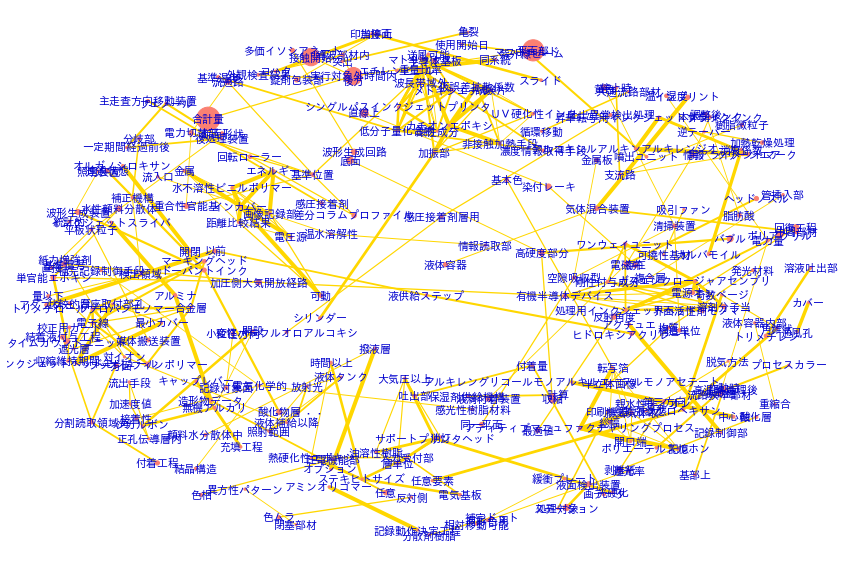

ginzaterm.xlsx データの共起関係描画
Number of nodes = 144
Number of edges = 154


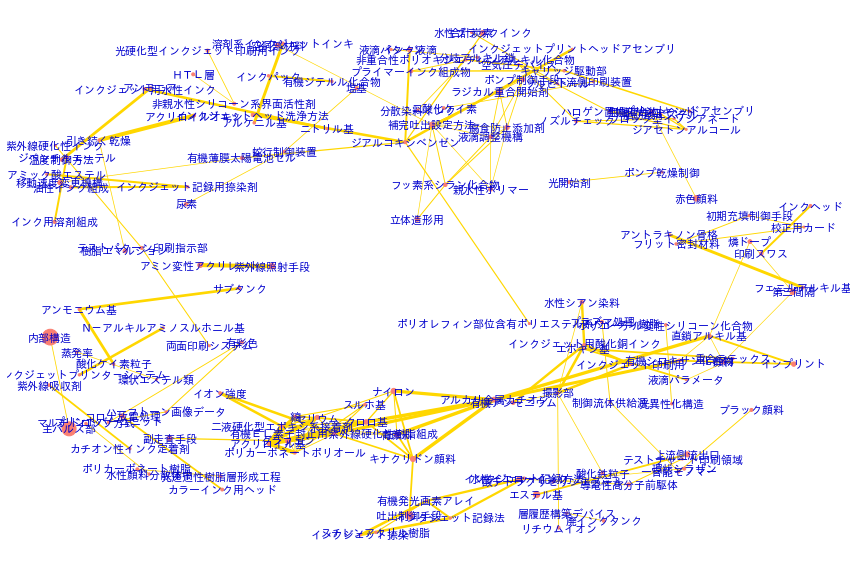

In [0]:
# program 1-2-9 共起ネットワークを作成
import networkx as nx
# matplotlibのターミナル対応
import matplotlib
%matplotlib inline
import japanize_matplotlib
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

jp_font = {'fontname':'IPAGothic'}
conditions = [['termextract.xlsx', 4, 0.45], ['ginzaterm.xlsx', 3.5, 0.4]]

for condition in conditions:
  file, lim_coef, lim_Jaggard = condition
  print(file, 'データの共起関係描画')
  # Jaggard係数のファイルを読み込む
  result = pd.read_excel('data/'+file, sheet_name='共起関係').values
  result = result[(result[:, 5] >= lim_coef) & (result[:, 6] >= lim_Jaggard)]
  count = np.vstack((result[:, 1:3], result[:, 3:5]))

  # グラフの作成
  G = nx.Graph()

  # node（頂点）を作成
  node_list = np.unique(count[:, 0])
  node_size = []
  for word in node_list:
    node_size.append(count[count[:, 0]==word][0])
  node_size = np.array(node_size)[:,1].astype('int')
  G.add_nodes_from(node_list)
  print('Number of nodes =', G.number_of_nodes())

  # edge（辺）を作成
  for i in range(len(result)):
    G.add_edge(result[i, 1], result[i, 3], weight=result[i, 6])
  print('Number of edges =', G.number_of_edges())

  # nodeの配置方法の指定
  seed = 1
  np.random.seed(seed)
  pos = nx.spring_layout(G, k=0.3, seed=seed)
  labels = node_list

  # エッジ太さをJaccard係数により変える
  edge_width = result[:, 6]**2*4

  # プロット
  fig, ax = plt.subplots(figsize=(12,8))
  nx.draw_networkx(G, pos, node_size=node_size, width=edge_width, 
                  node_color='salmon', edge_color='gold', font_color='mediumblue', 
                  font_size=11, font_family='IPAexGothic', ax=ax)
  plt.axis('off')
  plt.tight_layout()
  plt.savefig('data/co-occurance.png', bbox_inches='tight')
  plt.show()


## WordCloud表示

In [0]:
# program 1-2-10 wordcloudのダウンロードとインストール
! git clone https://github.com/amueller/word_cloud
os.chdir('/content/drive/My Drive/word_cloud/')
! python setup.py install
os.chdir('/content/drive/My Drive/')

fatal: destination path 'word_cloud' already exists and is not an empty directory.
running install
running bdist_egg
running egg_info
writing wordcloud.egg-info/PKG-INFO
writing dependency_links to wordcloud.egg-info/dependency_links.txt
writing entry points to wordcloud.egg-info/entry_points.txt
writing requirements to wordcloud.egg-info/requires.txt
writing top-level names to wordcloud.egg-info/top_level.txt
reading manifest template 'MANIFEST.in'
writing manifest file 'wordcloud.egg-info/SOURCES.txt'
installing library code to build/bdist.linux-x86_64/egg
running install_lib
running build_py
UPDATING build/lib.linux-x86_64-3.6/wordcloud/_version.py
set build/lib.linux-x86_64-3.6/wordcloud/_version.py to '1.6.0.post1.dev0+g8217e20'
running build_ext
creating build/bdist.linux-x86_64/egg
creating build/bdist.linux-x86_64/egg/wordcloud
copying build/lib.linux-x86_64-3.6/wordcloud/stopwords -> build/bdist.linux-x86_64/egg/wordcloud
copying build/lib.linux-x86_64-3.6/wordcloud/color_from

In [0]:
# program 1-2-11 日本語フォントのインストール
!apt-get -y install fonts-ipafont-gothic

Reading package lists... Done
Building dependency tree       
Reading state information... Done
fonts-ipafont-gothic is already the newest version (00303-18ubuntu1).
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
0 upgraded, 0 newly installed, 0 to remove and 7 not upgraded.


mecab データの可視化


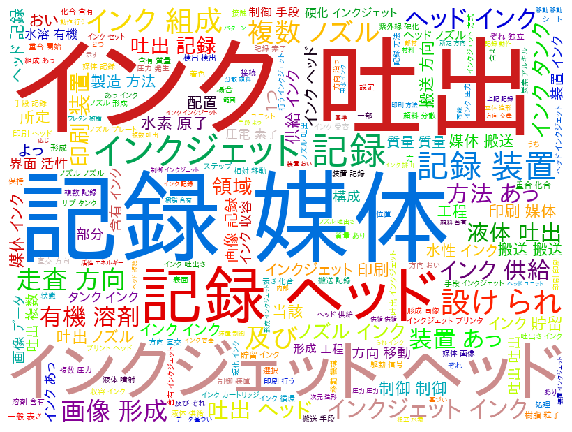

sentencepiece データの可視化


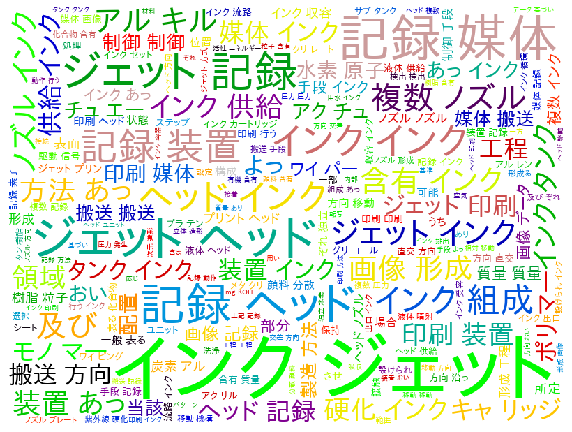

TermExtract データの可視化


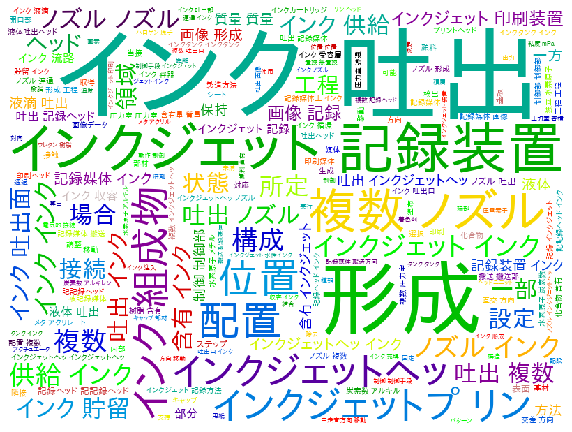

TExMeCab データの可視化


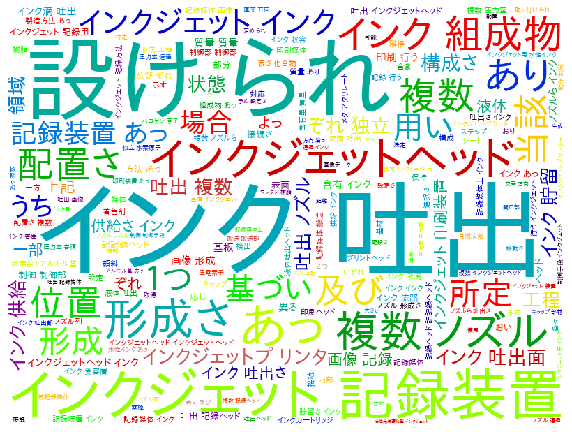

ginza データの可視化


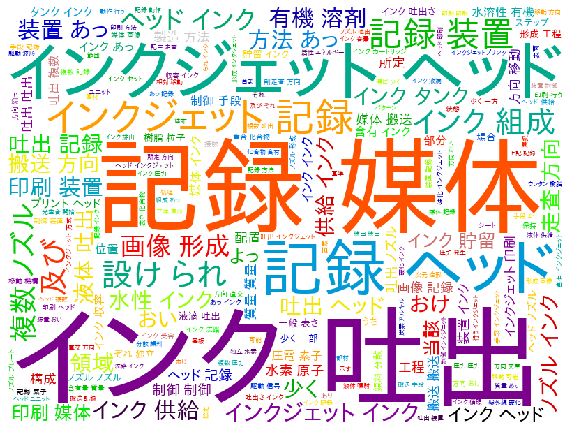

entginza データの可視化


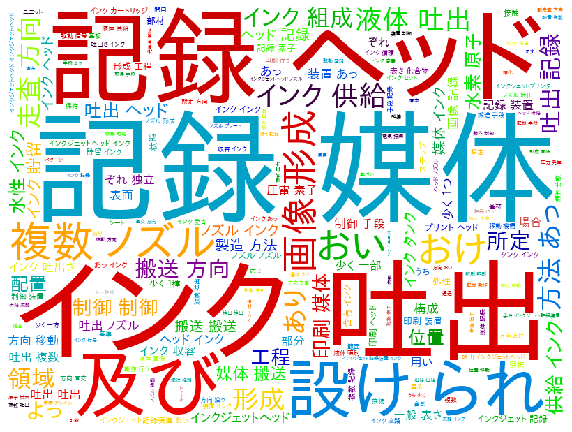

In [0]:
# program 1-2-12 wordcloudによる可視化
import re
#import MeCab
import pandas as pd
from wordcloud import WordCloud
import matplotlib.pyplot as plt

files = ['orinigal_mecab.csv', 'orinigal_sentencepiece.csv', 
         'orinigal_TermExtract.csv', 'orinigal_TExMeCab.csv',
         'orinigal_ginza.csv', 'orinigal_entginza.csv']

for file in files:
  print(file.replace('.csv', '').replace('orinigal_', ''), 'データの可視化')
  df = pd.read_csv('data/'+file, header =None)
  textdata = df.loc[:, [1]].values

  # ⑬ストップワード(取り除く語）設定
  stop_words = [u'前記', u'特徴', u'思う', u'及び', u'且つ', u'少なくとも', 
                u'\S*備え', u'\S*含み', u'\S*一般式', u'\S*有し', u'下記\S*', 
                u'\S*含む', u'\S*よる', u'\S*以上\S*', u'\S*以下\S*', u'\S*第\S*', 
                u'ある', u'いる', u'おける', u'および',
                u'か', u'かつ', u'くださる', u'くれる', u'くん', u'ここ', u'こと', u'これ', u'が', 
                u'さん', u'され', u'し', u'した', u'して', u'する', u'せる', u'そう', u'それ', 
                u'た', u'ちゃん', u'て', u'てる', u'と', u'で', 
                u'な', u'ない',u'なる', u'に', u'の', u'ので', 
                u'は', 
                u'も', 
                u'やる', u'よう',  u'より', 
                u'れる', 
                u'を', 
                ]

  stop_words = '|'.join(stop_words)
  pattern = re.compile(stop_words)

  #文字列データの集約
  text = ''
  for i in range(len(textdata)):
    text += textdata[i, 0] + ' '
  text = re.sub(pattern, '', text)
  # ⑭wordcloud描画
  fpath = '/usr/share/fonts/opentype/ipafont-gothic/ipagp.ttf'
  wordcloud = WordCloud(background_color='white', font_path=fpath, width=800, height=600,
                        collocations=False, stopwords=set(stop_words), colormap='nipy_spectral_r').generate(text)
  plt.figure(figsize=(10,8))
  plt.imshow(wordcloud)
  plt.axis("off")
  plt.show()

  # ⑮ファイルに保存
  wordcloud.to_file('./data/wordcloud_'+file.replace('.csv', '').replace('orinigal_', '')+'.png')

# おまけ

TermExtractで抽出した技術用語についてはMeCabで形態素に分割されないようにした文書セットをつくる

MeCabは辞書にない英単語を分割せずにスルーさせることから、

TermExtractで抽出した技術用語をユニークなアルファベット文字列に変換

元の文章に対してアルファベット文字列で置換

MeCabで形態素解析

アルファベット文字列を技術用語に戻す

という手順で目的の文書セットを作る

また、正規表現でアルファベット文字列だけを抜き出して技術用語に戻すことによって技術用語のみからなる文章も作ってみる

In [0]:
# MeCabのインストール
!apt install aptitude swig
!aptitude install mecab libmecab-dev mecab-ipadic-utf8 git make curl xz-utils file -y
!pip install mecab-python3

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following package was automatically installed and is no longer required:
  libnvidia-common-430
Use 'apt autoremove' to remove it.
The following additional packages will be installed:
  aptitude-common libcgi-fast-perl libcgi-pm-perl libclass-accessor-perl
  libcwidget3v5 libencode-locale-perl libfcgi-perl libhtml-parser-perl
  libhtml-tagset-perl libhttp-date-perl libhttp-message-perl libio-html-perl
  libio-string-perl liblwp-mediatypes-perl libparse-debianchangelog-perl
  libsigc++-2.0-0v5 libsub-name-perl libtimedate-perl liburi-perl libxapian30
  swig3.0
Suggested packages:
  aptitude-doc-en | aptitude-doc apt-xapian-index debtags tasksel
  libcwidget-dev libdata-dump-perl libhtml-template-perl libxml-simple-perl
  libwww-perl xapian-tools swig-doc swig-examples swig3.0-examples swig3.0-doc
The following NEW packages will be installed:
  aptitude aptitude-common libcgi-fast-perl lib

In [0]:
import pandas as pd
import numpy as np
import MeCab
import re
m = MeCab.Tagger('-O wakati')

# ①Excelファイルの読み込み 、pandasデータフレーム化
df = pd.read_excel('data/orinigal_data.xlsx', sheet_name='text')
df = df.loc[:,['公報番号(全文リンク)', '請求の範囲(独立請求項)']]
print('\n①データフレームの表示\n', df)

# wordextractファイルを読み込む
terms = pd.read_excel('data/termextract.xlsx', sheet_name='抽出結果')
terms = terms[terms['チェック'] == 1].values
print() 

# ②技術用語 → アルファベット 置換処理
rep_table = [] 
n =0
for i in range(len(terms)):
  try:
    while True:
      tmp = str(n).zfill(5)
      n += 1
      if m.parse(tmp).replace(' \n', '') == tmp:
        break
      print(tmp, end=' ')
  except KeyboardInterrupt:
    print('処理中断')
  tmp = tmp.replace('1', 'QB').replace('2', 'QC').replace('3', 'QD').replace('4', 'QF')
  tmp = tmp.replace('5', 'QG').replace('6', 'QH').replace('7', 'QJ').replace('8', 'QK')
  tmp = tmp.replace('9', 'QL').replace('0', 'QM')
  print('\r置換処理中', str(i)+'/'+str(len(terms)), n, tmp+'Q', end = '')
  rep_table.append(tmp)
  df['請求の範囲(独立請求項)'] = df['請求の範囲(独立請求項)'].str.replace(terms[i, 0], tmp+'Q')
print('\r置換処理中', str(i)+'/'+str(len(terms)), '... 完了')
rep_table = np.array(rep_table)
print('\n②データフレームの置換後表示\n', df, '\n')

# ③MeCab処理
#  正規表現のコンパイル
sep = re.compile('【.*?】|\n|\u3000| ')
ext = re.compile('Q[B-Q]{9}Q')

# 高速処理のためpandas dataframeをnumpyに変換
textdata = df.values

mecab_processed_data = [] # MeCab処理用空のリスト
Extract_data = [] #TermExtractで抽出されたデータのみで構成された文書を格納する空のリスト
# 1行（1文書）毎取り出し
for text in textdata:
  # 正規表現による置換
  tmp = sep.sub('', text[1]) # textは1行2列のnumpy行列であるため、[1]で2番目の要素を取り出している
  # 形態素解析（MeCab）
  cache = m.parse(tmp)
  # 空のリストに集約（MeCab）
  cache = cache.replace('Q ', 'Q').replace('B ', 'B').replace('C ', 'C').replace('D ', 'D')
  cache = cache.replace('F ', 'F').replace('G ', 'G').replace('H ', 'H').replace('J ', 'J')
  cache = cache.replace('K ', 'K').replace('L ', 'L').replace('M ', 'M').replace('QQ', 'Q Q')
  mecab_processed_data.append([text[0], cache])
  matches = re.findall(ext, cache)
  cache = ''
  for match in matches:
    cache += match + ' '
  Extract_data.append([text[0], cache[:-1]])
data = pd.DataFrame(mecab_processed_data, columns=['公報番号(全文リンク)', '請求の範囲(独立請求項)'])
docs = pd.DataFrame(Extract_data, columns=['公報番号(全文リンク)', '請求の範囲(独立請求項)'])
print('\n③MeCab処理後\n', data, '\n')
print('\nTermExtractによる文書\n', docs, '\n')


# ④アルファベット → 技術用語 逆順に置換処理
for i in reversed(range(len(terms))):
  tmp = rep_table[i]
  print('\r置換処理中', str(i)+'/'+str(len(terms)), terms[i, 0], end = '')
  data['請求の範囲(独立請求項)'] = data['請求の範囲(独立請求項)'].str.replace(tmp+'Q', terms[i, 0])
  docs['請求の範囲(独立請求項)'] = docs['請求の範囲(独立請求項)'].str.replace(tmp+'Q', terms[i, 0])
print('\r置換処理中', str(i)+'/'+str(len(terms)), '... 完了')
print('\n④技術用語戻し後\n', data)
print('\n技術用語戻し後\n', docs)

# ⑤csvファイルとして出力
data['請求の範囲(独立請求項)'] = data['請求の範囲(独立請求項)'].str.replace('  ', ' ')
data.to_csv('data/orinigal_TExMeCab.csv', columns=['公報番号(全文リンク)', '請求の範囲(独立請求項)'], 
            header=False, index=False)
docs['請求の範囲(独立請求項)'] = docs['請求の範囲(独立請求項)'].str.replace('  ', ' ')
docs.to_csv('data/orinigal_TermExtract.csv', columns=['公報番号(全文リンク)', '請求の範囲(独立請求項)'], 
            header=False, index=False)


①データフレームの表示
         公報番号(全文リンク)                                       請求の範囲(独立請求項)
0     特開2019-218636  【請求項１】  染色液によるメディアへの着色度合を調整する単独では前記メディア上で視認困難な...
1     特開2019-218522  【請求項１】  着色剤、アラビアガム、炭素数１２以上、２０以下の高級アルコール、炭素数１以上...
2     特開2019-218514  【請求項１】  少なくとも前処理液とインクとからなるインクジェット記録液セットであって、  ...
3     特開2019-218448  【請求項１】  インクジェット用の水性インクの製造方法であって、  顔料、及び界面活性剤を混...
4     特開2019-218446  【請求項１】  水性媒体と、  スクアリリウム骨格を有する化合物と樹脂とを含有する赤外線吸収...
...             ...                                                ...
4721    ＷＯ13/183282  【請求項１】  インクを収容するインク収容部と、前記インク収容部内の前記インクに圧力を印加し...
4722    ＷＯ13/183280  【請求項１】  インクを収容するインク収容部、圧電素子により前記インク収容部内の前記インクに...
4723    ＷＯ13/176253  【請求項１】  駆動信号に基づいて駆動するインクジェットヘッドと、  外部装置から入力される...
4724    ＷＯ13/172213  【請求項１】  ＢＥＴ換算粒径による平均粒径５０～１０００ｎｍの機能性粒子と、ＢＥＴ換算粒径...
4725    ＷＯ13/168806  【請求項１】  それぞれ色素、水、及び水溶性有機溶剤を少なくとも含有する、マゼンタインク及び...

[4726 rows x 2 columns]

置換処理中 16262/16263 ... 完了

②データフレームの置換後表示
         公報番号(全文リンク)                                       請求の範囲(独立